<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/4.%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/4.%20%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%20%ED%9A%8C%EA%B7%80(Softmax_Regression).ipynb

에서 가져왔다.

#4. 소프트맥스 회귀(Softmax Regression)

##4.1 원-핫 인코딩(One-Hot Encoding)

범주형 데이터를 처리할 때 레이블을 표현하는 방법인 원-핫 인코딩에 대해 배우자.

###4.1.1 원-핫 인코딩이란?

원-핫 인코딩은 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법이다.

예를 들어 강아지, 고양이, 냉장고가 있다하자.

강아지 = [1, 0, 0]

고양이 = [0, 1, 0]

냉장고 = [0, 0, 1]

로 표현하는게 원-핫 인코딩이다. 이 벡터들을 원-핫 벡터라고 한다.

###4.1.2 원-핫 벡터의 무작위성

범주형 데이터가 각 데이터 간의 관계가 균등하다는 점에서 원-핫 벡터는 적절한 표현 방법이다.

다중 클래스 분류 문제도 각 클래스 간의 관계가 균등하다는 점에서 적절한 표현 방법이다.

예를 들어 강아지, 고양이, 냉장고를 정수 인코딩 (0, 1, 2) 으로  레이블 한다면, 강아지와 고양이 사이의 관계(1-0 = 1)가 강아지와 냉장고 사이의 관계(2-0 = 2)보다 가깝다고 생각될 수 있다.

클래스 간의 관계가 균등하기 때문에 특정 클래스가 가깝다고 여겨지는 정수 인코딩보다 원-핫 인코딩이 클래스의 성질을 잘 표현했다고 할 수 있다.

이걸 아래의 식인 MSE를 사용하여 확인해보자.

$Loss\ function = \frac{1}{n} \sum_i^{n} \left(y_{i} - \hat{y_{i}}\right)^2$

강아지, 고양이, 냉장고라는 3개의 클래스를 각각 0, 1, 2 로 정수 인코딩한다.

실제값이 강아지, 예측값이 고양이면 MSE는 다음과 같다.

$(1-0)^{2} = 1$

실제값이 강아지, 예측값이 냉장고면 MSE는 다음과 같다.

$(2-0)^{2} = 4$

오차의 값이 다르다. 즉, 이는 기계에게 강아지가 냉장고보다 고양이에 가깝다는 정보를 주는 것과 다름 없다.

더 많은 클래스에 대해 정수 인코딩을 수행하면? 난리난다.

정리하겠다. 정수 인코딩과 달리 원-핫 인코딩은 분류 문제에서 모든 클래스 간의 관계를 균등하게 분배한다.

원-핫 인코딩을 했을 때의 MSE를 보겠다.

$((1,0,0)-(0,1,0))^{2} = (1-0)^{2} + (0-1)^{2} + (0-0)^{2} = 2$

$((1,0,0)-(0,0,1))^{2} = (1-0)^{2} + (0-0)^{2} + (0-1)^{2} = 2$

원-핫 인코딩은 클래스의 관계를 균등하기 만들기 때문에 원-핫벡터는 무작위성을 가진다. 각 클래스를 인코딩 할 때 표현 방법이 무작위하다는 것이다. 예를 들어 강아지가 (1,0,0) 일지 (0,1,0) 일지 (0,0,1) 일지 모른다. 이러한 원-핫 벡터의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 하는데 기억하지 말자ㅎ...

## 4.2 소프트맥스 회귀 이해하기

로지스틱 회귀 : 2개 중 1개 고르는 이진 분류

소프트맥스 회귀 : 3개 이상 중 1개 고르는 다증 클래스 분류

###4.2.1 다중 클래스 분류

아래는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이라는 4개의 특성(feature)로부터 setosa, versicolor, virginica 라는 3개의 붓꽃 품종을 예측하는 문제이다.

|SepalLengthCm$(x_1)$|SepalWidthCm$(x_2)$|PetalLengthCm$(x_3)$|PetalWidthCm$(x_4)$|Species$(y)$|
|---|---|---|---|---|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

이번 챕터의 설명에서 입력은 $X$, 가중치는 $W$, 편향은 $B$, 출력은 $\hat{Y}$로 각 변수는 벡터 또는 행렬로 가정한다.

*   $\hat{Y}$은 예측값이라는 의미를 가지고 있으므로 가설식에서 $H(X)$ 대신 사용되기도 한다.

1) 로지스틱 회귀

로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1사이의 값으로 만든다.

예를 들어 스팸 메일 분류기를 로지스틱 회귀로 구현하면, 출력이 0.75라면 스팸일 확률이 75%라는 의미가 된다. 동시에, 스팸이 아닐 확률이 25%가 된다.

![대체 텍스트](https://camo.githubusercontent.com/acee24af0ee38fcf4de25f774073d702ad289194/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f35393432372f2545422541312539432545432541372538302545432538412541342545442538422542312545442539412538432545412542372538302e504e47)

가설 : $H(X) = sigmoid(WX + B)$

2) 소프트맥스 회귀

소프트맥스 회귀에서 소프트맥스 함수는 예측값을 0과 1사이의 값으로 만든다.

선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 소프트맥스 함수를 지나게 만들어야 한다.

![대체 텍스트](https://camo.githubusercontent.com/2be4df15c4c65877caf65dced6533ed34009e39e/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f35393432372f2545432538362538432545442539342538342545442538412542382545422541372541352545432538412541342545442539412538432545412542372538302e504e47)

가설 : $H(X) = softmax(WX + B)$

###4.2.2 소프트맥스 함수

소프트맥스 함수는 클래스의 개수(k라고 하자)만큼의 차원을 가진 벡터를 입력받아 각 클래스에 대한 확률을 추정한다.

1) 소프트맥스 함수의 이해

k차원의 벡터에서 i번째 원소를 $z_i$, i번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 하였을 때 소프트맥스 함수는 $p_i$를 다음과 같이 정의한다.

$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$

![대체 텍스트](https://camo.githubusercontent.com/2be4df15c4c65877caf65dced6533ed34009e39e/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f35393432372f2545432538362538432545442539342538342545442538412542382545422541372541352545432538412541342545442539412538432545412542372538302e504e47)

위에서 풀어야하는 문제에 소프트맥스 함수를 차근차근 적용해보자. 문제의 경우 k=3이므로 3차원 벡터 $z=[z_{1}\ z_{2}\ z_{3}]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴한다.

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$

$p_1,p_2,p_3$  각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 된다.

여기서 분류하고자하는 3개의 클래스는 virginica, setosa, versicolor이므로 이는 결국 주어진 입력이 virginica일 확률, setosa일 확률, versicolor일 확률을 나타내는 값을 의미한다.

여기서는 i가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정하였다고 하자. 이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택이다. 이에따라 식을 문제에 맞게 다시 쓰면 아래와 같다.

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = [p_{virginica}, p_{setosa}, p_{versicolor}]$

정리 : 분류하고자 하는 클래스가 k개이면, k차원의 벡터를 입력받아서 벡터의 모든 원소의 값을 0과 1사이의 값으로 변경하고, 다시 k차원의 벡터를 리턴하면 된다.

2) 그림을 통한 이해

![](https://camo.githubusercontent.com/a6ede60782b3f8d590aca00e9e765ea5ec732afb/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f33353437362f736f66746d6178315f66696e616c5f66696e616c2e504e47)

질문 1 : 샘플 데이터를 소프트맥스 함수의 입력으로 어떻게 바꿀까?

|SepalLengthCm$(x_1)$|SepalWidthCm$(x_2)$|PetalLengthCm$(x_3)$|PetalWidthCm$(x_4)$|Species$(y)$|
|---|---|---|---|---|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

여기서 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정하자. 샘플 데이터가 1개씩 처리된다는 것은 배치 크기가 1이라는 것과 같은 의미다. 하나의 샘플 데이터는 4개의 독립 변수 $x$를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미한다.

4차원 벡터가 모델로 입력된 다음 단계는 소프트맥스 함수에 입력되는 것이다.

모델에 입력된 벡터는 4차원이고, 소프트맥스 함수에 입력될 수 있는 벡터는 3차원이다.

따라서, 입력된 4차원 벡터는 다시 어떤 가중치 연산을 통해 분류하고자 하는 클래스의 개수인 3차원 벡터로 변환되어야 한다. 

그래야 소프트맥스 함수의 입력으로 쓸 수 있다.

아래 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 $z$로 표현했다.

![](https://camo.githubusercontent.com/172a4d05ef2b15ec46c642dc195caf7fa97f047b/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f33353437362f736f66746d61786265747765656e31616e64322e504e47)

샘플 데이터 벡터(4차원)를 소프트맥스 함수의 입력 벡터(3차원)로 변환하는 방법은 소프트맥스 함수의 입력 벡터 $z$의 차원수만큼 결과값이 나오도록 가중치 곱을 진행하는 것이다.

즉 (4 x 3 = 12) 12개의 전부 다른 가중치로 학습 과정에서 점차적으로 오차를 최소화하면 된다.

질문 2 : 오차를 어떻게 구할까?

여기서는 첫번째 원소인 $p_1$은 virginica가 정답일 확률, 두번째 원소인 $p_2$는 setosa가 정답일 확률, 세번째 원소인 $p_3$은 versicolor가 정답일 확률로 고려한다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 한다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현한다. 아래 그림은 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여준다.

![](https://camo.githubusercontent.com/e57ce45ea8db9548650e711170568fd662b3d067/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f33353437362f736f66746d6178325f66696e616c2e504e47)

현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0,1,0]이다. 이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용한다.

![](https://camo.githubusercontent.com/5af606fdacad2a5d610b760eaad071314945e153/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f33353437362f736f66746d6178342e504e47)

![](https://camo.githubusercontent.com/b07ec8f666e2c2e3490c7f6a0da57a3ad3d5701e/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f33353437362f736f66746d6178352e504e47)

![](https://camo.githubusercontent.com/92fb01a7238490aad23863f2b331ffdcc9ccba0b/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f33353437362f736f66746d6178365f66696e616c2e504e47)

이런식으로 앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트 한다.

소프트맥스 회구를 벡터와 행렬 연산으로 이해해보자. 

입력 : 특성(feature)의 수만큼의 차원을 가진 입력 벡터 $x$

가중치 :  $W$

편향 : $B$

소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같다.

![](https://camo.githubusercontent.com/713e4d3501b73cb09e2d8ff1550ce3f08e719bc1/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f35393432372f2545412542302538302545432538342541342e504e47)

$f$는 특성의 수, $c$는 클래스의 개수이다.

###4.2.3 붓꽃 품종 분류를 행렬 연산으로 이해하기

|SepalLengthCm$(x_1)$|SepalWidthCm$(x_2)$|PetalLengthCm$(x_3)$|PetalWidthCm$(x_4)$|Species$(y)$|
|---|---|---|---|---|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

우선 위 예제 데이터는 샘플의 수 5개, 특성의 수 4개로 5 x 4 행렬 $X$로 정의하자

$X=
\left(
    \begin{array}{c}
      5.1\ 3.5\ 1.4\ 0.2\ \\
      4.9\ 3.0\ 1.4\ 0.2\ \\
      5.8\ 2.6\ 4.0\ 1.2\ \\
      6.7\ 3.0\ 5.2\ 2.3\ \\
      5.6\ 2.8\ 4.9\ 2.0\ \\
    \end{array}
  \right)$

각 행렬의 원소 위치를 반영한 변수로 표현하면

$X=\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)$

  이 문제는 선택지가 총 3개인 문제이므로 (=클래스가 총 3개인 문제이므로) 가설의 예측값으로 얻는 행렬 $\hat{Y}$의 열의 개수는 3개여야 한다. 각 행은 행렬 $X$의 각 행의 예측값이므로 행의 개수는 5개로 동일해야 한다. 행렬 $\hat{Y}$의 크기는 5 × 3 이다.

$\hat{Y}=\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)$

크기 5 × 3의 행렬 $\hat{Y}$는 

크기 5 × 4 입력 행렬 $X$와 

가중치 행렬 $W$의 곱으로 얻어지는 행렬이므로 

가중치 행렬 $W$은 4 × 3의 크기를 가진 행렬임을 알 수 있다.

$W=\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)$

편향 행렬 $B$는 예측값 행렬 $\hat{Y}$와 크기가 동일해야 하므로 5 × 3의 크기를 가진다.

$B=\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)$

결과적으로 가설식은 다음과 같다.

$\hat{Y} = softmax(XW + B)$

$\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)$=$softmax\left(
\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
\right)$





###4.2.4 비용 함수

소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용한다.

1) 크로스 엔트로피 함수

$y$ : 실제값

$k$ : 클래스의 개수

$y_j$ : 실제값 원-핫 벡터의 $j$번째 인덱스를 의미

$p_j$ : 샘플 데이터가 $j$번째 클래스일 확률 ($\hat{y}_{j}$로 표현하기도 한다.)

$cost(W) = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$

$c$가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, $p_{c}=1$은 $\hat{y}$가 $y$를 정확하게 예측한 경우가 된다.

이를 식에 대입해보면 $-1 log(1) = 0$이 되기 때문에, 결과적으로 $\hat{y}$가 $y$를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 된다. 즉, $-\sum_{j=1}^{k}y_{j}\ log(p_{j})$ 이 값을 최소화하는 방향으로 학습해야 한다.

이제 이를 $n$개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는 다음과 같다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

2) 이진 분류에서의 크로스 엔트로피 함수

로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식이다. 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해보자.

$cost(W) = -(y\ logH(X) + (1-y)\ log(1-H(X)))$

위의 식은 앞서 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식을 보여준다. 위의 식에서 $y$를 $y_1$, $y$−1을 $y_2$로 치환하고 $H(X)$를 $p_1$, 1−$H(X)$를 $p_2$로 치환하면 결과적으로 아래의 식을 얻을 수 있습니다.

$-(y_{1}\ log(p_{1})+y_{2}\ log(p_{2}))$

이 식은 아래와 같이 표현할 수 있다.

$-(\sum_{i=1}^{2}y_{i}\ log\ p_{i})$

소프트맥스 회귀에서는 k의 값이 고정된 값이 아니므로 2를 k로 변경하면

$-(\sum_{i=1}^{k}y_{i}\ log\ p_{i})$

위의 식은 결과적으로 소프트맥스 회귀의 식과 동일하다. 역으로 소프트맥스 회귀에서 로지스틱 회귀의 크로스 엔트로피 함수식을 얻는 것은 k를 2로 하고, $y_1$과 $y_2$를 각각 $y$와 1−$y$로 치환하고, $p_1$와 $p_2$를 각각 $H(X)$와 1−$H(X)$로 치환하면 된다.

정리하면 소프트맥스 함수의 최종 비용 함수에서 $k$가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]$

##4.3 소프트맥스 회귀의 비용 함수 구현하기

In [13]:
import torch
import torch.nn.functional as F
torch.manual_seed(1)

###4.3.1 파이토치로 소프트맥스 회귀의 비용 함수 구현하기 (로우-레벨)

In [0]:
z = torch.FloatTensor([1,2,3])

In [15]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$



In [16]:
hypothesis.sum()

tensor(1.)

In [17]:
z = torch.rand(3, 5, requires_grad=True)
z

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)

In [18]:
hypothesis = F.softmax(z, dim=1) # 각 샘플에 대해 소프트맥스 함수를 적용해야 하므로, 두번째 차원에 대해 소프트맥스 함수를 적용한다는 의미로, dim=1
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward>)


In [19]:
# 소프트맥스 함수의 출력값은 결국 예측값이고, 확률이다. 합은 1이다.
print(hypothesis[0,:].sum())
print(hypothesis[1,:].sum())
print(hypothesis[2,:].sum())

tensor(1.0000, grad_fn=<SumBackward0>)
tensor(1.0000, grad_fn=<SumBackward0>)
tensor(1., grad_fn=<SumBackward0>)


In [20]:
# 각 샘플에 대해 임의의 레이블을 만든다.
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [21]:
# 각 레이블에 대해 원-핫 인코딩을 수행한다.
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis) # hypothesis와 같은 크기를 가지고 모든 원소가 0의 값을 가지는 텐서를 만들어라.
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
"""
y.unsqueeze(1)에서 (3,)의 크기를 가졌던 y텐서는 (3x1) 텐서가 된다. 
scatter의 첫번째 인자는 dim=1 에 대해 수행하라는 의미
세번째 인자에 1을 넣어줌으로서 두번째 인자인 y_unsqueeze(1)이 알려주는 위치에 숫자 1을 넣도록 한다.
연산 뒤에 _를 붙이면 In-place Operation (덮어쓰기 연산) 이다.
"""
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

마이너스 부호를 뒤로 빼면 다음 식과도 동일하다.

$cost(W) = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ * (-log(p_{j}^{(i)}))$

이를 코드로 구현하면 아래와 같다.

In [22]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


###4.3.2 파이토치로 소프트맥스 회귀의 비용 함수 구현하기 (하이-레벨)

1)  F.softmax() + torch.log() = F.log_softmax()

In [23]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward>)

In [24]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward>)

2) F.log_softmax() + F.nll_loss() = F.cross_entropy()

In [25]:
# Low level
# 첫번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [26]:
# 두번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [27]:
# High level
# 세번째 수식
F.nll_loss(F.log_softmax(z, dim=1), y)
# nll : Negative Log Likelihood의 약자

tensor(1.4689, grad_fn=<NllLossBackward>)

In [28]:
# 네번째 수식
F.cross_entropy(z, y)
# 비용 함수에 소프트맥스 함수까지 포함하고 있음을 기억하고 있어야 구현 시 혼동하지 않는다.

tensor(1.4689, grad_fn=<NllLossBackward>)

##4.4 소프트맥스 회귀 구현하기

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [0]:
"""
x_train : 8 x 4 
y_trian : 8 x 1, 3개의 클래스
"""

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

###4.4.1 소프트맥스 회귀 구현하기(로우-레벨)

In [31]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [32]:
# y_train은 원-핫 인코딩 시켜줘야 한다.
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [0]:
# X가 8x4, Y가 8x3이므로 W는 4x3임을 추정할 수 있다.

# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(3, requires_grad=True) # 선형 회귀, 로지스틱 회귀에서는 b가 1이지만 이제는 클래스 개수 만큼이다.
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [34]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{nb_epochs}, Cost: {cost.item()}')

Epoch 0/1000, Cost: 1.0986123085021973
Epoch 100/1000, Cost: 0.704199492931366
Epoch 200/1000, Cost: 0.6229994893074036
Epoch 300/1000, Cost: 0.5657168030738831
Epoch 400/1000, Cost: 0.5152913928031921
Epoch 500/1000, Cost: 0.467661589384079
Epoch 600/1000, Cost: 0.42127782106399536
Epoch 700/1000, Cost: 0.37540143728256226
Epoch 800/1000, Cost: 0.3297658860683441
Epoch 900/1000, Cost: 0.2850724756717682
Epoch 1000/1000, Cost: 0.2481546401977539


###4.4.2 소프트맥스 회귀 구현하기(하이-레벨)

주의할 점은 F.cross_entropy()는 그 자체로 소프트맥스 함수를 포함하고 있다는 것이다.

In [0]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(3, requires_grad=True) # 선형 회귀, 로지스틱 회귀에서는 b가 1이지만 이제는 클래스 개수 만큼이다.
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [36]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{nb_epochs}, Cost: {cost.item()}')

Epoch 0/1000, Cost: 1.0986123085021973
Epoch 100/1000, Cost: 0.7041994333267212
Epoch 200/1000, Cost: 0.6229996681213379
Epoch 300/1000, Cost: 0.5657167434692383
Epoch 400/1000, Cost: 0.5152913928031921
Epoch 500/1000, Cost: 0.46766164898872375
Epoch 600/1000, Cost: 0.421277791261673
Epoch 700/1000, Cost: 0.37540167570114136
Epoch 800/1000, Cost: 0.3297656178474426
Epoch 900/1000, Cost: 0.28507253527641296
Epoch 1000/1000, Cost: 0.2481546550989151


###4.4.3 소프트맥스 회귀 nn.Module로 구현하기

In [0]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [38]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train) # F.cross_entropy() 가 소프트맥스 함수를 포함하고 있어서 가설에 정의하지 않음
    
    # Cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{nb_epochs}, Cost: {cost.item()}')

Epoch 0/1000, Cost: 1.8495128154754639
Epoch 100/1000, Cost: 0.6898943781852722
Epoch 200/1000, Cost: 0.6092584133148193
Epoch 300/1000, Cost: 0.5512182116508484
Epoch 400/1000, Cost: 0.5001410841941833
Epoch 500/1000, Cost: 0.4519471228122711
Epoch 600/1000, Cost: 0.405051052570343
Epoch 700/1000, Cost: 0.35873302817344666
Epoch 800/1000, Cost: 0.31291159987449646
Epoch 900/1000, Cost: 0.26952165365219116
Epoch 1000/1000, Cost: 0.2419215738773346


###4.4.4 소프트맥스 회귀 클래스로 구현하기

In [0]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4, 3)

  def forward(self, x):
    return self.linear(x)

In [0]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [41]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train) # F.cross_entropy() 가 소프트맥스 함수를 포함하고 있어서 가설에 정의하지 않음
    
    # Cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{nb_epochs}, Cost: {cost.item()}')

Epoch 0/1000, Cost: 1.845719814300537
Epoch 100/1000, Cost: 0.6471500396728516
Epoch 200/1000, Cost: 0.5688682198524475
Epoch 300/1000, Cost: 0.5156992077827454
Epoch 400/1000, Cost: 0.4717271327972412
Epoch 500/1000, Cost: 0.43248626589775085
Epoch 600/1000, Cost: 0.39587926864624023
Epoch 700/1000, Cost: 0.36050641536712646
Epoch 800/1000, Cost: 0.32522740960121155
Epoch 900/1000, Cost: 0.2892172932624817
Epoch 1000/1000, Cost: 0.2540856897830963


##4.5 소프트맥스 회귀로 MNIST 데이터 분류하기

MNIST 데이터는 아래의 링크에 공개되어져 있다.

링크 : http://yann.lecun.com/exdb/mnist

###4.5.1 MNIST 데이터 이해하기

![](https://camo.githubusercontent.com/06d848083b3f0d576769c6117934da8671de378b/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f36303332342f6d6e6973742e706e67)

MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋이다. 이 데이터는 과거에 우체국에서 편지의 우편 번호를 인식하기 위해서 만들어진 훈련 데이터이다. 총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어져 있다. 레이블은 0부터 9까지 총 10개다. 이 예제는 머신 러닝을 처음 배울 때 접하게 되는 가장 기본적인 예제다.

MNIST 문제는 손글씨로 적힌 숫자 이미지가 들어오면, 그 이미지가 무슨 숫자인지 맞추는 문제다. 예를 들어 숫자 5의 이미지가 입력으로 들어오면 이게 숫자 5다! 라는 것을 맞춰야 한다. 이 문제는 사람에게는 굉장히 간단하지만 기계에게는 그렇지가 않다.

우선 MNIST 문제를 더 자세히 보자. 각각의 이미지는 아래와 같이 28 픽셀 × 28 픽셀의 이미지다.

![](https://camo.githubusercontent.com/e49526e694f6e69b6b2eda80fa919c20d9acbebe/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f36303332342f6d6e6973745f535662635959472e706e67)

이 문제를 풀기 위해 여기서는 28 픽셀 × 28 픽셀 = 784 픽셀이므로, 각 이미지를 총 784의 원소를 가진 벡터로 만들어줄거다. 이렇게 되면 총 784개의 특성을 가진 샘플이 되는데, 이는 앞서 우리가 풀었던 그 어떤 문제들보다 특성이 굉장히 많은 샘플이 된다.

![](https://camo.githubusercontent.com/d6beaf8cdde9490a7129db3cf0ecfc2df964c665/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f36303332342f2545422538422541342545432539412542342545422541312539432545422539332539432e706e67)

In [0]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [43]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!





In [44]:
X,y = mnist_train[0]
print('X size = ',X.size())
print('입력 이미지를 [batch_size × 784]의 크기로 reshape 하면 X size = ',X.view(-1, 28*28).size())

X size =  torch.Size([1, 28, 28])
입력 이미지를 [batch_size × 784]의 크기로 reshape 하면 X size =  torch.Size([1, 784])


### 4.5.2 토치비전(torchvision) 소개하기

본격적인 실습에 들어가기에 앞서 토치비전(torchvision)이라는 도구를 설명하겠다. torchvision은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지다. 아래의 링크는 torchvision에 어떤 데이터셋들(datasets)과 모델들(models) 그리고 어떤 전처리 방법들(transforms)을 제공하고 있는지 보여준다.

링크 : https://pytorch.org/docs/stable/torchvision/index.html

자연어 처리를 위해서는 토치텍스트(torchtext)라는 패키지가 있다.

안 볼거다 ㅎ...


### 4.5.3 분류기 구현을 위한 사전 설정

In [45]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


구글의 Colab에서 '런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU'를 선택하면 USE_CUDA의 값이 True가 되면서 '다음 기기로 학습합니다: cuda'라는 출력이 나온다.

즉, GPU로 연산하겠다는 의미다. 반면에 '하드웨어 가속기 > None'을 선택하면 USE_CUDA의 값이 False가 되면서 '다음 기기로 학습합니다: cpu'라는 출력이 나온다. 즉, CPU로 연산하겠다는 의미다.

위의 방법은 앞으로 자주 쓰이게되므로 기억하자.

랜덤 시드를 고정하자.

In [0]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

### 4.5.4 MNIST 분류기 구현하기

In [0]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

첫번째 인자 root : MNIST 데이터를 다운로드 받을 경로

두번째 인자 train : True를 주면 MNIST의 훈련 데이터를 리턴, False를 주면 테스트 데이터를 리턴

세번째 인자 transform : 현재 데이터를 파이토치 텐서로 변환

네번째 인자 download : 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미

이렇게 데이터를 다운로드했다면 앞서 미니 배치와 데이터로드 챕터에서 학습했던 데이터로더(DataLoader)를 사용하자.

In [0]:
# hyperparameters를 변수로 두고 시작한다.
training_epochs = 15 # nb_epochs의 기능과 같다.
batch_size = 100

In [0]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True) # drop_last는 데이터를 배치 크기에 맞게 나눈 후(여기서는 100씩) 나머지(여기서는 100보다 작은 수)를 버린다는 의미다.

이때 DataLoader에는 4개의 인자가 있다.

첫번째 인자 DataLoader : 로드할 대상을 의미

두번째 인자 batch_size : 배치 크기

세번째 인자 shuffle : 매 에포크마다 미니 배치를 셔플할 것인지의 여부

네번째 인자 drop_last : 마지막 배치를 버릴 것인지를 의미합니다.

drop_last를 하는 이유 : 예를 들어, 1,000개의 데이터가 있다고 했을 때 배치 크기가 128이라고 해보자. 1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남는다. 이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있다. 이때 마지막 배치를 버리려면 drop_last=True를 해주면 된다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아준다.

이제 모델을 설계하자. input_dim은 784이고, output_dim은 10이다.

In [0]:
# MNIST data image of shape 28 * 28 = 784
model = nn.Linear(784, 10, bias=True).to(device)
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
# 크라이티어리언, 표준이라는 뜻, 굳이 안써도 되는데 왜쓰는지 모르겠다.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

to() 함수는 연산을 어디서 수행할지를 정한다. 

to() 함수는 모델의 매개변수를 지정한 장치의 메모리로 보낸다. 

CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 to('cuda')를 해 줄 필요가 있다. 

아무것도 지정하지 않은 경우에는 CPU 연산이라고 보면 된다.

bias는 편향 b를 사용할 것인지를 나타낸다. 기본값은 True이므로 굳이 할 필요는 없지만 명시적으로 True를 해주었다.

앞서 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy()를 사용하였으나 여기서는 torch.nn.CrossEntropyLoss()을 사용하고 있다. 

둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 소프트맥스 함수를 포함하고 있다.

In [51]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
  avg_cost = 0 
  """
  나는 한 epoch 당 cost를 알고 싶다.(60,000개로 한 바퀴 돌렸을 때의 cost) 
  근데 여기서 cost는 batch 마다 나온다. (한 배치인 100개를 돌렸을 때의 cost) 
  그래서 각 배치에서의 cost를 모두 더 한후 batch의 수 만큼 나눠줄거다.
  """
  num_batch = len(data_loader) # 60,000개를 100개씩 나누었으니 600개의 batch가 생긴다.
    
  for X, Y in data_loader:
    # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
    X = X.view(-1, 28 * 28).to(device)
    # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
    Y = Y.to(device)
    
    # H(x) 계산
    hypothesis = model(X)

    # Cost 계산
    cost = criterion(hypothesis, Y)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # print(f'cost : {cost}')
    avg_cost += cost / num_batch

  print(f'Epoch : {epoch}, Cost : {avg_cost}')

Epoch : 0, Cost : 0.5354684591293335
Epoch : 1, Cost : 0.3592742085456848
Epoch : 2, Cost : 0.33118751645088196
Epoch : 3, Cost : 0.31657806038856506
Epoch : 4, Cost : 0.30715814232826233
Epoch : 5, Cost : 0.3001807630062103
Epoch : 6, Cost : 0.29513019323349
Epoch : 7, Cost : 0.2908514738082886
Epoch : 8, Cost : 0.28741705417633057
Epoch : 9, Cost : 0.2843795716762543
Epoch : 10, Cost : 0.2818252742290497
Epoch : 11, Cost : 0.2798007130622864
Epoch : 12, Cost : 0.2778089940547943
Epoch : 13, Cost : 0.2761543393135071
Epoch : 14, Cost : 0.2744408845901489


Accuracy: 0.8862999677658081
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


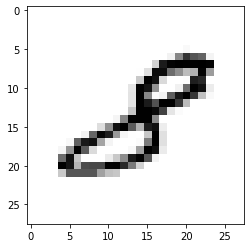

In [52]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

torch.no_grad() 와 model.eval()

공통점 : 범위 안에서는 gradient 계산을 하지 않는다.

차이점 : torch.no_grad()는 해당 범위 안에서 gradient 계산을 중지시킴으로써 메모리 사용량을 줄이고 계산 속도를 빨리 한다.

model.train()과 model.eval()은 모델이 학습 모드인지, 테스트 모드인지를 정하는 것이다. dropout이나 batchnorm이 있는 모델의 경우 학습할 때와 테스트할 때 모델이 달라지기 때문에 세팅한다.

##4.6 활용

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/4_1_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%ED%9A%8C%EA%B7%80_with_My_data.ipynb

sklearn에서 제공하는 미국 삼림 수종 데이터를 바탕으로 소프트맥스 회귀모델 학습

In [1]:
import pandas as pd
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()

In [2]:
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [3]:
covtype_df = pd.DataFrame(data=covtype['data'])
covtype_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = covtype_df
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)
data['target'] = covtype['target']-1
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,target
0,-1.297804,-0.935156,-1.482819,-0.053767,-0.796272,-1.180145,0.330743,0.439143,0.142960,3.246280,1.108079,-0.232859,-0.879363,-0.260673,-0.072416,-0.114549,-0.09149,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076971,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010334,-0.234031,-0.214979,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123653,4
1,-1.319234,-0.890479,-1.616361,-0.270188,-0.899196,-1.257105,0.293388,0.590898,0.221341,3.205501,1.108079,-0.232859,-0.879363,-0.260673,-0.072416,-0.114549,-0.09149,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076971,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010334,-0.234031,-0.214979,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123653,4
2,-0.554906,-0.148836,-0.681562,-0.006719,0.318742,0.532212,0.816363,0.742653,-0.196691,3.126963,1.108079,-0.232859,-0.879363,-0.260673,-0.072416,-0.114549,-0.09149,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,4.287864,-0.175866,-0.032125,-0.002272,-0.070148,-0.076971,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214979,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123653,1
3,-0.622767,-0.005869,0.520322,-0.129044,1.227907,0.474492,0.965785,0.742653,-0.536343,3.194928,1.108079,-0.232859,-0.879363,-0.260673,-0.072416,-0.114549,-0.09149,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076971,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,4.272927,-0.214979,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123653,1
4,-1.301376,-0.988769,-1.616361,-0.547770,-0.813426,-1.256463,0.293388,0.540313,0.195214,3.165476,1.108079,-0.232859,-0.879363,-0.260673,-0.072416,-0.114549,-0.09149,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076971,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010334,-0.234031,-0.214979,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123653,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012129,-0.023740,0.787407,-0.867696,-0.504653,-1.437960,1.040496,0.692068,-0.640851,-0.863386,-0.902461,-0.232859,1.137185,-0.260673,-0.072416,8.729878,-0.09149,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076971,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.214979,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123653,2
581008,-2.029987,-0.032675,0.653865,-0.952382,-0.590423,-1.446298,1.040496,0.692068,-0.614724,-0.857344,-0.902461,-0.232859,1.137185,-0.260673,-0.072416,8.729878,-0.09149,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076971,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.4

In [5]:
X,y = data.values[:,:-1],data.values[:,-1:]
print(X.shape,y.shape)

(581012, 54) (581012, 1)


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [0]:
class MyDataset(Dataset):
    def __init__(self):
        self.x_data = torch.FloatTensor(X)
        self.y_data = torch.LongTensor(y)
    def __len__(self):
        return len(self.x_data)

    def __getitem__(self,idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x,y

In [0]:
dataset = MyDataset()
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

In [0]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(54, 7)

    def forward(self, x):
        return self.linear(x)

In [0]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

In [12]:
nb_epochs = 100
for epoch in range(nb_epochs + 1):
    for x_train,y_train in dataloader:
        y_train = y_train.squeeze(1)
        # H(x) 계산
        hypothesis = model(x_train)
        # cost 계산
        cost=criterion(hypothesis, y_train)
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        correct_prediction = torch.argmax(hypothesis,dim=1) == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print(f'Epoch : {epoch}/{nb_epochs}, Cost: {cost.item()}, Accuracy : {accuracy * 100}%')


Epoch : 0/100, Cost: 2.105910062789917, Accuracy : 13.87871506956827%
Epoch : 1/100, Cost: 2.045290470123291, Accuracy : 18.061072748927735%
Epoch : 2/100, Cost: 1.9877128601074219, Accuracy : 21.919340736508026%
Epoch : 3/100, Cost: 1.9330474138259888, Accuracy : 25.009294128176357%
Epoch : 4/100, Cost: 1.8810876607894897, Accuracy : 27.67946273054601%
Epoch : 5/100, Cost: 1.8318874835968018, Accuracy : 29.966334602383426%
Epoch : 6/100, Cost: 1.785164475440979, Accuracy : 32.12085120445017%
Epoch : 7/100, Cost: 1.7408995628356934, Accuracy : 34.5853441925468%
Epoch : 8/100, Cost: 1.6990392208099365, Accuracy : 37.56118634382767%
Epoch : 9/100, Cost: 1.659314751625061, Accuracy : 40.41362312654472%
Epoch : 10/100, Cost: 1.6217429637908936, Accuracy : 43.98532216202075%
Epoch : 11/100, Cost: 1.5861486196517944, Accuracy : 47.78317831645474%
Epoch : 12/100, Cost: 1.552445411682129, Accuracy : 51.271058084858836%
Epoch : 13/100, Cost: 1.5205663442611694, Accuracy : 54.31540140306913%
Epo